# Optimization

Almost every problem in machine learning and data science starts
with a dataset $X$, a model $g(\theta)$, which is a function of the parameters $\theta$ and a cost function $C(X, g(\theta))$ that allows us to judge how well the
model $g(\theta)$ explains the observations $X$. The model is fit by finding the values of $\theta$ that minimize the cost function.

We will look at a class of methods for computing minima of functions known as gradient descent and its generalizations. 

# Gradient Descent

The basic idea of gradient descent is that a function $F(\mathbf{x})$, $ \mathbf{x} \equiv (x_1,\cdots,x_n)$, decreases fastest if one goes from $\bf {x}$ in the direction of the negative gradient $-\nabla F(\mathbf{x})$.

It follows that, if 
\begin{equation}
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma \nabla F(\mathbf{x}_k), \ \ \gamma > 0
\end{equation}
for $\gamma$ small enough, then $F(\mathbf{x}_{k+1}) \leq F(\mathbf{x}_k)$. This means that for a sufficiently small $\gamma$ we moves towards smaller function values, i.e a minimum.

This observation is the basis of the gradient descent (GD) method. One starts with an initial guess $\mathbf{x}_0$ for a minimum of $F$ and compute new approximations according to

\begin{equation}
\mathbf{x}_{k+1} = \mathbf{x}_k - \gamma \nabla F(\mathbf{x}_k), \ \ k \geq 0.
\end{equation}

Ideally the sequence $\{ \mathbf{x}_k \}_{k=0}$ converges to a __global__ minimum of the function $F$. In general we do not know if we are in a global or local minimum.  In the special case when $F$ is a convex function, all local minima are also global minima, so in this case gradient descent can converge to the global solution. We will explore this further in the exercises.

In a practical implementation we have to choose a criterion for when to stop the iteration. One such condition would be to stop when 

\begin{equation}
||\nabla F(\mathbf{x})|| < \epsilon,
\end{equation}
where $\epsilon$ is some small number. 


The parameter $\gamma$ is referred to as the step size and is constant in the simplest Gradient Descent scheme. We will consider generalizations later where $\gamma$ is adaptet during each iteration in order to obtain faster convergence or esacpe local minima.

Another point worth noticing is that in order to use gradient descent all we need to know is the function and its gradient. Computing the gradient may be difficult depending on the complexity of the function we want to minimize. 

## Exercise 1
We start by considering functions of a single variable since they are easy to work with and we can compute exact minima to compare our implementation. Furthermore, single variable functions captures much of the problems we experience computing minima of more complex, multi-variable functions.

a) Consider the function $f(x) = x^2+1$. Show that $f(x_{k+1}) \leq f(x_k)$ when $0 \leq \gamma \leq 1$.

Hint: Use that (GD step) $x_{k+1} = x_k - \gamma f'(x_k)$ and solve the resulting inequality.

Solution: 

\begin{align}
x_k^2(1-2\gamma)^2 + 1 &\leq x_k^2+1 \\
(1-2\gamma)^2 &\leq 1 \\
\gamma(1-\gamma) &\leq 0 \\
\Rightarrow 0 \leq \gamma &\leq 1.
\end{align}

b) Show/convince yourself that f has its minimum at $x=0$ with $f(0) = 1$. 

Write a function computes the minimum using the GD method, with $x_0 = -3$ as initial guess. Try to write the function in a general way such that you in principle can use it on any function.

Experiment with different step sizes in the range $0 < \gamma < 1$ and check how many iterations you need in order for the solution to converge within a precision of $10^{-6}$. 

Since the derivative has to be zero in a minimum you can use $$|f'(x_k)| < \epsilon,$$ with $\epsilon = 10^{-6}$ as a criterion for convergence. (The choice of $10^{-6}$ as precision is arbitrary).

What happens if you choose $\gamma$ exactly equal to 1? What happens if $\gamma$ is slighly larger than 1? One way to get a better visual understanding of whats going on is to plot the function and the function values at each iteration, $f(x_k)$, within the same plot.

Converged: True
Number of iterations for convergence: 18


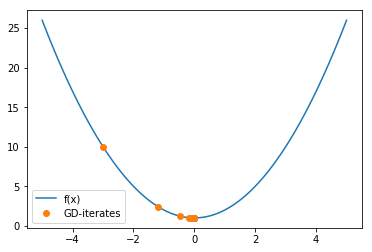

In [1]:
#Program that solves exercise 1b.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(xk,dx_f,gamma):
    return xk-gamma*dx_f

def quadratic(a,b,c,x):
    return a*x**2+b*x+c

def dx_quadratic(a,b,x):
    return 2*a*x+b

#One variable examples
a,b,c   = 1,0,1
x       = np.linspace(-5,5,101)
quad    = quadratic(a,b,c,x)
dx_quad = dx_quadratic(a,b,x)

xk        = -3
xk_vec    = [xk]
fxk_vec   = [quadratic(a,b,c,xk)]
gamma     = 0.3
iters     = 0
max_iters = 1000
converged = False

while(abs(dx_quadratic(a,b,xk)) > 1e-6 and iters < max_iters):
    xk = gradient_descent(xk,dx_quadratic(a,b,xk),gamma)
    xk_vec.append(xk)
    fxk_vec.append(quadratic(a,b,c,xk))
    iters += 1

if(iters < max_iters):
    converged = True

print ("Converged: %s" % converged)
print ("Number of iterations for convergence: %d" % iters)

plt.figure(1)
plt.plot(x,quad)
plt.plot(xk_vec,fxk_vec,'o')
plt.legend(["f(x)","GD-iterates"])
plt.show()

c) Quadratic functions as the one in exercise b) are particularly forigiving to work with since they only have one minimum/maximum, which in turn is global. A third order polynomial can have a maximum and a minimum or a saddle point. A fourth order polynomial may have two local minima. The point of the following exercise is to investigate the how GD depends on the initial guess, $x_0$.

Consider the function
\begin{equation}
f(x) = \frac{(x+4)(x+1)(x-1)(x-3)}{14} + \frac{1}{2},
\end{equation}
with derivative 
\begin{equation}
f'(x) = \frac{1}{14}\left( 4x^3 + 3x^2 - 26x -1 \right).
\end{equation}

Make a plot of the function for $x \in [-5,4]$. The function has a global minimum at $x \approx -2.9354$, a local maximum at $x \approx -0.038301$ and a local minimum at $x \approx 2.2237$. Choose $\gamma = 0.1$ as step length and use GD descent to compute the minimum. 

* Expermient with different initial values $x_0 \in [-5,-0.1]$ and $x_0 \in [0.1, 4]$. 
* What happens if you choose $x_0 = -0.038301$ (i.e at the local maximum)? Explain why this happens. 
* What happens if you choose $x_0$ slightly smaller/larger than $-0.038301$? 
* Furthermore you can experiment with different step sizes.

Converged: True
Number of iterations for convergence: 67


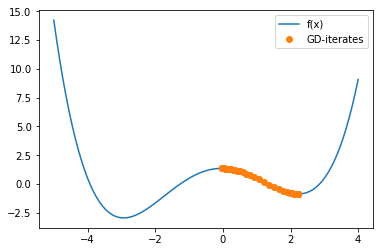

In [29]:
def quartic(x):
    return (x+4)*(x+1)*(x-1)*(x-3)/14.0 + 0.5
def dx_quartic(x):
    return (1.0/14.0)*(4*x**3 + 3*x**2 - 26*x - 1)

x = np.linspace(-5,4,101)
quart    = quartic(x)
dx_quart = dx_quartic(x)

xk        = -0.02
xk_vec    = [xk]
fxk_vec   = [quartic(xk)]
gamma     = 0.1
iters     = 0
max_iters = 200
converged = False

while(abs(dx_quartic(xk)) > 1e-6 and iters < max_iters):
    xk = gradient_descent(xk,dx_quartic(xk),gamma)
    xk_vec.append(xk)
    fxk_vec.append(quartic(xk))
    iters += 1

if(iters < max_iters):
    converged = True

print ("Converged: %s" % converged)
print ("Number of iterations for convergence: %d" % iters)

plt.figure(1)
plt.plot(x,quart)
plt.plot(xk_vec,fxk_vec,'o')
plt.legend(["f(x)","GD-iterates"])
plt.show()

d) In this exercise we will look at function of two variables. 

Consider the function 
\begin{equation}
z(x,y) = x^2+10y^2-1.
\end{equation}

* Compute the gradient and show that $z(x,y)$ has its minimum at $x=0, y=0$.
* Extend your program such that it can compute the minimum of a multivariate function. The main difference now is that the points and derivative/gradient now are vectors/arrays and not just scalars. Also try to make relevant visualizations, such as surface or contour plots.
* As before, experiment with different step sizes $\gamma$ and intitial values $\mathbf{x}_0 = (x_0,y_0)$.


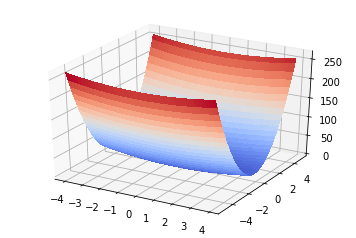

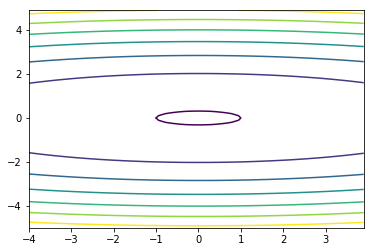

Number of iterations for convergence: 142
[4.77010127e-07 0.00000000e+00]


In [30]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

#Two variable example
def Z(x,y):
    return x**2+10*y**2-1

def grad_Z(x,y):
    gZ = np.zeros(2)
    gZ[0] = 2*x
    gZ[1] = 20*y
    return gZ

X = np.arange(-4,4,0.1)
Y = np.arange(-5,5,0.1)

X_, Y_ = np.meshgrid(X, Y)
Z_ = Z(X_,Y_)
fig = plt.figure(2)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X_, Y_, Z_, cmap=cm.coolwarm,linewidth=0, antialiased=False)
plt.show()
plt.figure(3)
plt.contour(X_,Y_,Z_,corner_mask=0)
plt.show()

xk = np.zeros(2)
xk[0] = 1.5
xk[1] = 2.3

gamma = 0.05
iters = 0
max_iters = 200
converged = False
while(abs(np.linalg.norm(grad_Z(xk[0],xk[1]))) > 1e-6 and iters < max_iters):
    xk = xk - gamma*grad_Z(xk[0],xk[1])
    iters += 1
print ("Number of iterations for convergence: %d" % iters)
print(xk)

## Exercise 2 (Linear regression)

In this exercise we will work out how Gradient Descent is used in the context of linear regression. The method is unchanged, however we have to minimize a different function, namely the cost function. 


\begin{equation}
\hat{y} = \theta_0x_0 + \sum_{i=1}^n \theta_i x_i, \ \ \hat{y} = \theta^T \cdot \bar{x}
\end{equation}
where $x_0 \equiv 1$ by convention (?)


The normal equation
\begin{equation}
\hat{\theta} = (X^TX)^{-1} X^Ty
\end{equation}


Number of iterations before convergence: 694
[2.13232543e-10 2.06977546e-10]
[3.99638664 3.010951  ]
[3.99638664 3.010951  ]


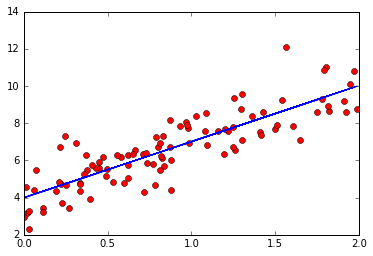

In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#One variable example
N  = 100
x0 = np.ones(N)
x1 = 2*np.random.rand(N)
y = 4 + 3*x1 + np.random.randn(N)


#Compute theta and predicted y using normal equations
X = np.c_[x0,x1]
Xt_X_inv = np.linalg.inv(np.dot(X.transpose(),X))
Xt_y     = np.dot(X.transpose(),y)
theta_normeqs = np.dot(Xt_X_inv,Xt_y)


#Compute theta using gradient descent
eta = 0.1 
max_iters = 100
theta = np.random.randn(2)

diff = 100
iters = 0
while(diff > 1e-10):
    gradient = 2.0/float(N) * np.dot(X.transpose(), np.dot(X,theta) - y)
    theta = theta-eta*gradient
    diff = np.linalg.norm(gradient)
    iters += 1

#Output number of iterations before convergence and compare theta computed with GD with theta computed 
#using the Normal equations
print("Number of iterations before convergence: %d" % iters)
print(abs(theta_normeqs-theta))
print(theta_normeqs)
print(theta)

#Plot true y and y_predicted
plt.figure(4)
y_pred = theta[0] + theta[1]*x1
plt.plot(x1,y,'ro')
plt.plot(x1,y_pred,'-b')
plt.show()

Number of iterations before convergence: 1134
[4.37898606e-10 1.89083416e-10 1.88844496e-10]
[3.52385905 2.51683929 2.59844067]
[3.52385905 2.51683929 2.59844067]


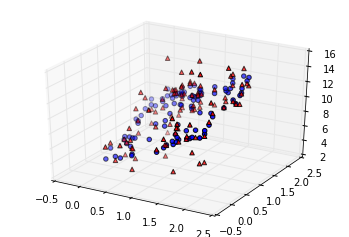

In [18]:
#Two variable example
N = 100
x0 = np.ones(N)
x1 = 2*np.random.rand(N)
x2 = 2*np.random.rand(N)

noise_scale = 2
g_noise = noise_scale*np.random.randn(N)

y = 4+3*x1+2*x2+g_noise

#Compute theta using normal equations
X = np.c_[x0,x1,x2]
Xt_X_inv = np.linalg.inv(np.dot(X.transpose(),X))
Xt_y     = np.dot(X.transpose(),y)
theta_normeqs = np.dot(Xt_X_inv,Xt_y)


#Compute theta using gradient descent
eta = 0.1 
max_iters = 100
theta = np.random.randn(3)

diff = 100
iters = 0
while(diff > 1e-10):
    gradient = 2.0/float(N) * np.dot(X.transpose(), np.dot(X,theta) - y)
    theta = theta-eta*gradient
    diff = np.linalg.norm(gradient)
    iters += 1

#Output number of iterations before convergence and compare theta computed with GD with theta computed 
#using the Normal equations
print("Number of iterations before convergence: %d" % iters)
print(abs(theta_normeqs-theta))
print(theta_normeqs)
print(theta)

#Plot true y and y_predicted
y_pred = theta[0] + theta[1]*x1+theta[2]*x2
fig = plt.figure(5)
ax = fig.gca(projection='3d')
scatter1 = ax.scatter(x1, x2, y,marker='^',c='r')
scatter2 = ax.scatter(x1, x2, y_pred,marker='o',c='b')
plt.show()

## Short summary so far

Summary...
